# RDKIT TUTORIAL

## Rdkit安装

In [1]:
# conda install -c conda-forge rdkit
import rdkit
rdkit.__version__

'2021.09.2'

## 读写分子

CCC(C)(C)c1ccc2c(c1)C(=O)c1ccccc1C2=O


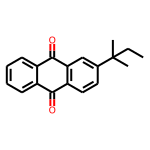

In [2]:
# mol -> smiles
from rdkit import Chem
from rdkit.Chem import Draw
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
smiles = Chem.MolToSmiles(mol)
#画分子图
print(f'{mol}\n{smiles}')
Draw.MolToImage(mol, size=(150, 150),fitImage=True)

In [3]:
# smiles -> mol
smile = 'COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl'
mol = Chem.MolFromSmiles(smile)
print(f'{mol}')
# 保存mol文件
Chem.MolToMolFile(mol,'data/CHEMBL1087421.mol')
#打印mol格式内容
print(Chem.MolToMolBlock(mol)) 


     RDKit          2D

 21 23  0  0  0  0  0  0  0  0999 V2000
    0.7500   -6.4952    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -5.1962    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7500    1.2990    0

In [4]:
# sdf -> smiles
from rdkit.Chem import AllChem
sdf_file = 'data/Structure2D_CID_44138048.sdf'
mols = Chem.SDMolSupplier(sdf_file)
for mol in mols:
    smiles = Chem.MolToSmiles(mol)
    print(f'{smiles}')

COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2


***其他补充材料***<br/>
[1] https://www.jianshu.com/p/c0df2942d8d1 <br/>
[2] http://rdkit.chenzhaoqiang.com/basicManual.html#id3

## 分子指纹提取

### MACCS指纹

In [5]:
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs.cDataStructs import ConvertToNumpyArray
from rdkit import Chem
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
fps = MACCSkeys.GenMACCSKeys(mol)
print(len(fps.ToBitString()))
fps.ToBitString()[1:]

167


'0000000000000000000000000000000000000000000000000000000000000000010000000100000000000000000000000000100010000001011000000000101000000001000010111000100101100011011110'

### 摩根指纹

In [6]:
from rdkit.Chem import AllChem
import numpy as np
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
## GetMorganFingerprintAsBitVect((Mol)mol, (int)radius, (int)nBits=2048)
## @radius: 扫描半径 
## @nBits: 存储ECFP的位数
fp = AllChem.GetMorganFingerprintAsBitVect(mol,2,512)
#np.array(fp)
fp.ToBitString()

## 默认半径为2的摩根指纹就是ECFP4指纹
## 半径为2且考虑feature-based invariants得到的指纹为FCFP4指纹
## m1 = Chem.MolFromSmiles('c1ccccn1')
## ecfp4_mg = AllChem.GetMorganFingerprintAsBitVect(m1,2)
## fcfp4_mg = AllChem.GetMorganFingerprintAsBitVect(m1,2,useFeatures=True)

'01100000000000000000000000000000010010000000000000000000001000001000000000000000100000000000000000000000000000000010000000001000010000000010000000000000000000000000000010000001000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000100000000000000000011000000000000000000100000000000000000000001000000000000001000100000010000000000000000000000000100110000000000000000000000000000000000001000000000000000000000100000000000000000001000000000000000000000000000000000000000'

{1: ((4, 2), (3, 2), (7, 2)), 2: ((19, 2),), 33: ((17, 0), (18, 0), (20, 0)), 36: ((12, 2),), 58: ((16, 1),), 64: ((1, 1), (0, 1)), 80: ((19, 0),), 114: ((16, 0),), 124: ((8, 2),), 129: ((11, 2),), 138: ((14, 0), (15, 0)), 168: ((10, 2),), 175: ((1, 2), (0, 2)), 214: ((2, 1), (5, 1), (10, 1), (11, 1)), 275: ((16, 2),), 294: ((20, 1),), 295: ((19, 1),), 314: ((14, 1), (15, 1)), 337: ((0, 0), (1, 0), (2, 0), (5, 0), (10, 0), (11, 0), (13, 0)), 352: ((3, 1), (4, 1), (7, 1), (8, 1)), 356: ((3, 0), (4, 0), (6, 0), (7, 0), (8, 0), (9, 0), (12, 0)), 363: ((13, 1),), 389: ((9, 2), (6, 2)), 392: ((17, 1), (18, 1)), 393: ((12, 1),), 430: ((13, 2),), 452: ((9, 1), (6, 1)), 472: ((2, 2), (5, 2))}


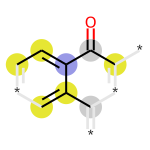

In [7]:
#计算ECFP4指纹中有效的信息
from rdkit.Chem import AllChem
from rdkit import Chem
import numpy as np
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
bi = {}
fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=512,bitInfo=bi)
"""
通过向参数bitInfo传入字典，可以获取所有非空指纹信息，
字典info键表示位的索引，值为原子索引、半径构成的元组，出现多个元组时，表示子结构出现了多次。

值表示的含义：里面的最小单元对应的是(atom index, radius)。 
(19, 2)表示19号原子半径2的指纹。 
((4, 2), (3, 2), (7, 2))表示4号原子、3号原子和7号原子 原子半径为1的指纹。
蓝色：表示中心原子
黄色：表示带有芳香性质的原子
灰色：表示在脂肪环中的原子
"""
print(bi)
# 对摩根指纹中的bit进行可视化
Draw.DrawMorganBit(mol, 1, bi)
#for v in bi.values():
#    print(v)

In [8]:
"""
以提取出2的结构为例，首先提取mol中，半径为2，第19个原子的结构
@submol1: 接收提取出的子结构
@amap: 用于接收原子索引的映射关系，键为原始分子中的原子索引，值为子结构中的原子索引
@env: 是被提取出的键的索引
"""
env = Chem.FindAtomEnvironmentOfRadiusN(mol,2,19)
amap={}
submol1 = Chem.PathToSubmol(mol,env,atomMap=amap)
print(amap)
# 用SMILES表示该子结构
print(Chem.MolToSmiles(submol1))
# env = Chem.FindAtomEnvironmentOfRadiusN(mol,1,1)
# amap={}
# submol11=Chem.PathToSubmol(mol,env,atomMap=amap)

# env = Chem.FindAtomEnvironmentOfRadiusN(mol,1,0)
# amap={}
# submol12=Chem.PathToSubmol(mol,env,atomMap=amap)

# mols=[submol25,submol11,submol12]
# Draw.MolsToGridImage(mols,molsPerRow=3,subImgSize=(300,200),legends=['' for x in mols])

{12: 0, 16: 1, 17: 2, 18: 3, 19: 4, 20: 5}
CCC(c)(C)C


In [9]:
# 设置不同的nBits 计算ECFP4指纹中有效信息的个数
from rdkit.Chem import AllChem
from rdkit import Chem
import numpy as np
from rdkit.Chem import Draw
nbitss=[64,128,256,512,1024,2048]
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
for nbit in nbitss:
    bi = {}
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=nbit,bitInfo=bi)
    print("num non zero bit in nBit=%d: %d"%(nbit,len(bi.keys())))

num non zero bit in nBit=64: 25
num non zero bit in nBit=128: 26
num non zero bit in nBit=256: 27
num non zero bit in nBit=512: 28
num non zero bit in nBit=1024: 28
num non zero bit in nBit=2048: 28


***更多资料***<br/>
[1] https://blog.csdn.net/dreadlesss/article/details/105976113 <br/>
[2] http://rdkit.chenzhaoqiang.com/basicManual.html#maccs-maccskeys-genmaccskeys-mol

## 最大公共子结构

In [10]:
from rdkit.Chem import rdFMCS
from rdkit import Chem
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1,mol2,mol3]
"""
SMARTS：模式描述语言,可以显示结构搜索条件，例如通配符和条件规范
"""
res=rdFMCS.FindMCS(mols)
print(res.smartsString)
common=Chem.MolFromSmarts(res.smartsString)
#print(res.smartsString,Chem.MolToSmiles(common))

atom_indices = mol1.GetSubstructMatch(common) #得到匹配的原子序号
print(atom_indices)
print(mol1.HasSubstructMatch(common)) #如果考虑手性结构，可以添加参数useChirality=True
print("查看该子结构：",Chem.MolFragmentToSmiles(mol1,atomsToUse=atom_indices, rootedAtAtom=4)) # 根据SMRATS查询，返回的对应的结构

[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]
(4, 3, 5, 6, 7, 8, 9, 11, 12, 10)
True
查看该子结构： c1(C)ccc(O)c(OC)c1


***更多资料***<br/>
[1] https://blog.csdn.net/dreadlesss/article/details/105976113

## 分子相似性计算

In [11]:
# 基于 MACCS 指纹和 Dice 相似性方法计算相似性
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
smis=[
    'CC(=O)CC(C1=CC=C(C=C1)[N+]([O-])=O)C1=C(O)C2=CC=CC=C2OC1=O',
    'CC(=O)CC(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=CC=C2',
    'CCC(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=CC=C2'
]
mols =[]
for smi in smis:
    m = Chem.MolFromSmiles(smi)
    mols.append(m)

fps = [MACCSkeys.GenMACCSKeys(x) for x in mols]
sm01=DataStructs.FingerprintSimilarity(fps[0],fps[1],metric=DataStructs.DiceSimilarity)
sm02=DataStructs.FingerprintSimilarity(fps[0],fps[2],metric=DataStructs.DiceSimilarity)
sm12=DataStructs.FingerprintSimilarity(fps[1],fps[2],metric=DataStructs.DiceSimilarity)

print("similarity between mol 1 and mol2: %.2f"%sm01)
print("similarity between mol 1 and mol3: %.2f"%sm02)
print("similarity between mol 2 and mol3: %.2f"%sm12)

similarity between mol 1 and mol2: 0.78
similarity between mol 1 and mol3: 0.70
similarity between mol 2 and mol3: 0.92


## 操作分子

<table>
<thead>
  <tr>
    <th colspan="2">原子操作</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>对原子进行遍历</td>
    <td>m.GetAtoms()</td>
  </tr>
  <tr>
    <td>获取原子索引</td>
    <td>GetIdx()</td>
  </tr>
  <tr>
    <td>获取原子序号</td>
    <td>GetAtomicNum()</td>
  </tr>
  <tr>
    <td>获取原子符号</td>
    <td>GetSymbol()</td>
  </tr>
  <tr>
    <td>获取原子连接数（受H是否隐藏影响）</td>
    <td>GetDegree()</td>
  </tr>
  <tr>
    <td>获取原子总连接数（与H是否隐藏无关）</td>
    <td>GetTotalDegree()</td>
  </tr>
      <tr>
    <td>与该原子连接的氢原子个数</td>
    <td>GetTotalNumHs()</td>
  </tr>
  <tr>
    <td>获取原子形式电荷</td>
    <td>GetFormalCharge()</td>
  </tr>
  <tr>
    <td>获取原子杂化方式</td>
    <td>GetHybridization()</td>
  </tr>
  <tr>
    <td>获取原子显式化合价</td>
    <td>GetExplicitValence()</td>
  </tr>
  <tr>
    <td>获取原子隐式化合价</td>
    <td>GetImplicitValence()</td>
  </tr>
  <tr>
    <td>获取原子总的化合价</td>
    <td>GetTotalValence()</td>
  </tr>
      <tr>
    <td>该原子是否在芳香烃内</td>
    <td>GetIsAromatic()</td>
  </tr>
          <tr>
    <td>获取相连的原子</td>
    <td>GetNeighbors()</td>
  </tr>
</tbody>
</table>

In [12]:
from rdkit import Chem
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
print('\t'.join(['id', 'num', 'symbol', 'degree', 'HsNumber','explicit','implicit','aromatic','charge', 'hybrid']))
for atom in mol.GetAtoms():
    print(atom.GetIdx(), end='\t')
    print(atom.GetAtomicNum(), end='\t')
    print(atom.GetSymbol(), end='\t')
    print(atom.GetDegree(), end='\t')
    print(atom.GetTotalNumHs(), end='\t\t')
    print(atom.GetExplicitValence(), end='\t\t')
    print(atom.GetImplicitValence(), end='\t\t')
    print(atom.GetIsAromatic(), end='\t\t')
    print(atom.GetFormalCharge(), end='\t')
    print(atom.GetHybridization())

id	num	symbol	degree	HsNumber	explicit	implicit	aromatic	charge	hybrid
0	6	C	2	1		3		1		True		0	SP2
1	6	C	2	1		3		1		True		0	SP2
2	6	C	2	1		3		1		True		0	SP2
3	6	C	3	0		4		0		True		0	SP2
4	6	C	3	0		4		0		True		0	SP2
5	6	C	2	1		3		1		True		0	SP2
6	6	C	3	0		4		0		False		0	SP2
7	6	C	3	0		4		0		True		0	SP2
8	6	C	3	0		4		0		True		0	SP2
9	6	C	3	0		4		0		False		0	SP2
10	6	C	2	1		3		1		True		0	SP2
11	6	C	2	1		3		1		True		0	SP2
12	6	C	3	0		4		0		True		0	SP2
13	6	C	2	1		3		1		True		0	SP2
14	8	O	1	0		2		0		False		0	SP2
15	8	O	1	0		2		0		False		0	SP2
16	6	C	4	0		4		0		False		0	SP3
17	6	C	1	3		1		3		False		0	SP3
18	6	C	1	3		1		3		False		0	SP3
19	6	C	2	2		2		2		False		0	SP3
20	6	C	1	3		1		3		False		0	SP3


In [13]:
# 也可以通过索引获取原子：GetAtomWithIdx()
print(mol.GetAtomWithIdx(0).GetSymbol())

C


In [14]:
# 获取相连的原子：GetNeighbors()
from rdkit import Chem
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
atom = mol.GetAtomWithIdx(9)
# print([x.GetAtomicNum() for x in atom.GetNeighbors()])
print([x.GetIdx() for x in atom.GetNeighbors()])

[8, 4, 14]


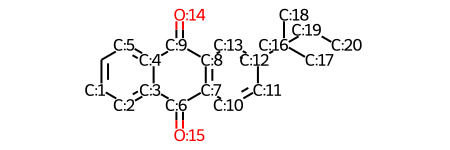

In [15]:
#原子节点删除
from rdkit import Chem
from rdkit.Chem import Draw
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
mol

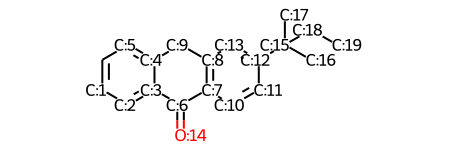

In [16]:
# RWMol类的编辑功能
m_copy = mol
mw = Chem.RWMol(m_copy)
#删除mol中原子序号为14的原子,每次删除后索引都会更新
mw.RemoveAtom(14)
#编辑完成转换回mol类型
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

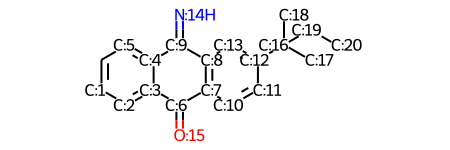

In [17]:
# RWMol类的编辑功能
m_copy = mol
mw = Chem.RWMol(m_copy)
# 替换原子：ReplaceAtom(index, newAtom, …) 
# index：要替换的原子索引
# newAtom：新的原子对象
mw.ReplaceAtom(14, Chem.Atom(7)) # O-->N
#编辑完成转换回mol类型
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

21


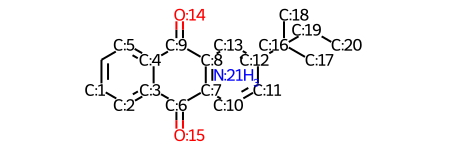

In [18]:
# RWMol类的编辑功能
m_copy = mol
mw = Chem.RWMol(m_copy)
# 添加原子：AddAtom(atom)
# atom：要添加的原子对象 返回值是新添加原子的索引
index = mw.AddAtom(Chem.Atom(7))
print(index)
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

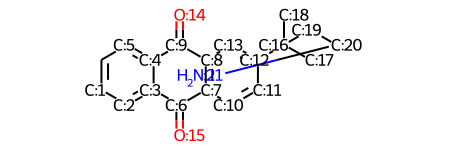

In [19]:
#添加键：AddBond(beginAtomIdx, endAtomIdx, order)
#beginAtomIdx：键的起始原子 endAtomIdx：键的末尾原子 order：键的类型
mw.AddBond(21, 20, Chem.BondType.SINGLE)
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

<table>
<thead>
  <tr>
    <th colspan="2">键操作</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>对键进行遍历</td>
    <td>m.GetBonds()</td>
  </tr>
  <tr>
    <td>获取键的索引</td>
    <td>GetIdx()</td>
  </tr>
  <tr>
    <td>获取键的类型</td>
    <td>GetGetBondType()</td>
  </tr>
  <tr>
    <td>以数字形式显示键的类型</td>
    <td>GetBondTypeAsDouble()</td>
  </tr>
  <tr>
    <td>是否为芳香键</td>
    <td>GetIsAromatic()</td>
  </tr>
  <tr>
    <td>是否为共轭键</td>
    <td>GetIsConjugated()</td>
  </tr>
  <tr>
    <td>是否在环中</td>
    <td>IsInRing()</td>
  </tr>
  <tr>
    <td>是否在n元环中</td>
    <td>IsInRingSize(n)</td>
  </tr>
  <tr>
    <td>获取起始原子</td>
    <td>GetBeginAtomIdx()</td>
  </tr>
  <tr>
    <td>获取末尾原子</td>
    <td>GetEndAtomIdx()</td>
  </tr>
</tbody>
</table>


In [20]:
from rdkit import Chem
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
print('\t'.join(['id', 'type', '\tdouble', 'aromic', 'conjug', 'ring', 'begin', 'end']))
for bond in mol.GetBonds():
    print(bond.GetIdx(), end='\t')
    print(bond.GetBondType(), end='\t')
    print(bond.GetBondTypeAsDouble(), end='\t')
    print(bond.GetIsAromatic(), end='\t')
    print(bond.GetIsConjugated(), end='\t')
    print(bond.IsInRing(), end='\t')
    print(bond.GetBeginAtomIdx(), end='\t')
    print(bond.GetEndAtomIdx())

id	type		double	aromic	conjug	ring	begin	end
0	AROMATIC	1.5	True	True	True	0	1
1	AROMATIC	1.5	True	True	True	1	2
2	AROMATIC	1.5	True	True	True	2	3
3	AROMATIC	1.5	True	True	True	3	4
4	AROMATIC	1.5	True	True	True	4	5
5	AROMATIC	1.5	True	True	True	5	0
6	SINGLE	1.0	False	True	True	3	6
7	SINGLE	1.0	False	True	True	6	7
8	AROMATIC	1.5	True	True	True	7	8
9	SINGLE	1.0	False	True	True	8	9
10	SINGLE	1.0	False	True	True	9	4
11	AROMATIC	1.5	True	True	True	7	10
12	AROMATIC	1.5	True	True	True	10	11
13	AROMATIC	1.5	True	True	True	11	12
14	AROMATIC	1.5	True	True	True	12	13
15	AROMATIC	1.5	True	True	True	13	8
16	DOUBLE	2.0	False	True	False	9	14
17	DOUBLE	2.0	False	True	False	6	15
18	SINGLE	1.0	False	False	False	12	16
19	SINGLE	1.0	False	False	False	16	17
20	SINGLE	1.0	False	False	False	16	18
21	SINGLE	1.0	False	False	False	16	19
22	SINGLE	1.0	False	False	False	19	20


In [21]:
# 也可以通过索引获取键：GetBondWithIdx()
print(mol.GetBondWithIdx(0).GetBondType())

AROMATIC


In [22]:
# 获得两个atom(atom_index1, atom_index2)之间的键的信息
mol.GetBondBetweenAtoms(0, 1).GetIdx()

0

***更多资料***<br/>
[1] https://zhuanlan.zhihu.com/p/143111689 <br/>
[2] http://rdkit.chenzhaoqiang.com <br/>
[3] https://www.zhihu.com/column/c_1136672568080846848

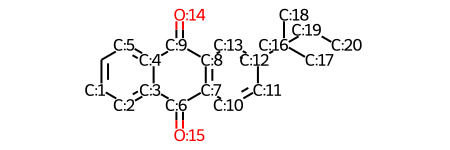

In [24]:
#原子节点删除
from rdkit import Chem
from rdkit.Chem import Draw
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
for atom in mol.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
mol

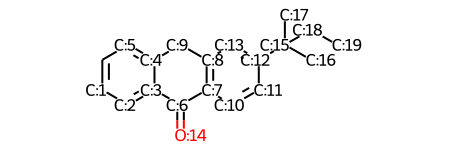

In [25]:
# RWMol类的编辑功能
m_copy = mol
mw = Chem.RWMol(m_copy)
#删除mol中原子序号为14的原子,每次删除后索引都会更新
mw.RemoveAtom(14)
#编辑完成转换回mol类型
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

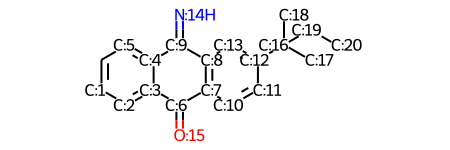

In [26]:
# RWMol类的编辑功能
m_copy = mol
mw = Chem.RWMol(m_copy)
# 替换原子：ReplaceAtom(index, newAtom, …) 
# index：要替换的原子索引
# newAtom：新的原子对象
mw.ReplaceAtom(14, Chem.Atom(7)) # O-->N
#编辑完成转换回mol类型
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

21


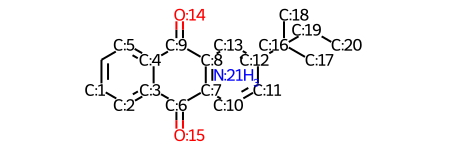

In [27]:
# RWMol类的编辑功能
m_copy = mol
mw = Chem.RWMol(m_copy)
# 添加原子：AddAtom(atom)
# atom：要添加的原子对象 返回值是新添加原子的索引
index = mw.AddAtom(Chem.Atom(7))
print(index)
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

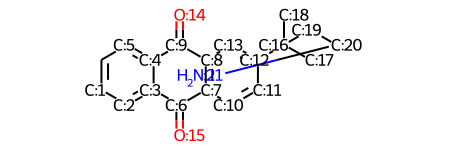

In [28]:
#添加键：AddBond(beginAtomIdx, endAtomIdx, order)
#beginAtomIdx：键的起始原子 endAtomIdx：键的末尾原子 order：键的类型
mw.AddBond(21, 20, Chem.BondType.SINGLE)
m_copy = mw.GetMol()
for atom in m_copy.GetAtoms():
    atom.SetAtomMapNum(atom.GetIdx())
m_copy

<table>
<thead>
  <tr>
    <th colspan="2">键操作</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>对键进行遍历</td>
    <td>m.GetBonds()</td>
  </tr>
  <tr>
    <td>获取键的索引</td>
    <td>GetIdx()</td>
  </tr>
  <tr>
    <td>获取键的类型</td>
    <td>GetGetBondType()</td>
  </tr>
  <tr>
    <td>以数字形式显示键的类型</td>
    <td>GetBondTypeAsDouble()</td>
  </tr>
  <tr>
    <td>是否为芳香键</td>
    <td>GetIsAromatic()</td>
  </tr>
  <tr>
    <td>是否为共轭键</td>
    <td>GetIsConjugated()</td>
  </tr>
  <tr>
    <td>是否在环中</td>
    <td>IsInRing()</td>
  </tr>
  <tr>
    <td>是否在n元环中</td>
    <td>IsInRingSize(n)</td>
  </tr>
  <tr>
    <td>获取起始原子</td>
    <td>GetBeginAtomIdx()</td>
  </tr>
  <tr>
    <td>获取末尾原子</td>
    <td>GetEndAtomIdx()</td>
  </tr>
</tbody>
</table>


In [29]:
from rdkit import Chem
mol_file = 'data/AAQ.mol'
mol = Chem.MolFromMolFile(mol_file)
print('\t'.join(['id', 'type', '\tdouble', 'aromic', 'conjug', 'ring', 'begin', 'end']))
for bond in mol.GetBonds():
    print(bond.GetIdx(), end='\t')
    print(bond.GetBondType(), end='\t')
    print(bond.GetBondTypeAsDouble(), end='\t')
    print(bond.GetIsAromatic(), end='\t')
    print(bond.GetIsConjugated(), end='\t')
    print(bond.IsInRing(), end='\t')
    print(bond.GetBeginAtomIdx(), end='\t')
    print(bond.GetEndAtomIdx())

id	type		double	aromic	conjug	ring	begin	end
0	AROMATIC	1.5	True	True	True	0	1
1	AROMATIC	1.5	True	True	True	1	2
2	AROMATIC	1.5	True	True	True	2	3
3	AROMATIC	1.5	True	True	True	3	4
4	AROMATIC	1.5	True	True	True	4	5
5	AROMATIC	1.5	True	True	True	5	0
6	SINGLE	1.0	False	True	True	3	6
7	SINGLE	1.0	False	True	True	6	7
8	AROMATIC	1.5	True	True	True	7	8
9	SINGLE	1.0	False	True	True	8	9
10	SINGLE	1.0	False	True	True	9	4
11	AROMATIC	1.5	True	True	True	7	10
12	AROMATIC	1.5	True	True	True	10	11
13	AROMATIC	1.5	True	True	True	11	12
14	AROMATIC	1.5	True	True	True	12	13
15	AROMATIC	1.5	True	True	True	13	8
16	DOUBLE	2.0	False	True	False	9	14
17	DOUBLE	2.0	False	True	False	6	15
18	SINGLE	1.0	False	False	False	12	16
19	SINGLE	1.0	False	False	False	16	17
20	SINGLE	1.0	False	False	False	16	18
21	SINGLE	1.0	False	False	False	16	19
22	SINGLE	1.0	False	False	False	19	20


In [30]:
# 也可以通过索引获取键：GetBondWithIdx()
print(mol.GetBondWithIdx(0).GetBondType())

AROMATIC


In [31]:
# 获得两个atom(atom_index1, atom_index2)之间的键的信息
mol.GetBondBetweenAtoms(0, 1).GetIdx()

0

***更多资料*** <br/>
[1] https://zhuanlan.zhihu.com/p/143111689 <br/>
[2] http://rdkit.chenzhaoqiang.com <br/>
[3] https://www.zhihu.com/column/c_1136672568080846848<br/>